<a href="https://colab.research.google.com/github/AryanGoyal123/Machine-learning-Projects/blob/main/Basic_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0,50,501)
y = np.sin(x)

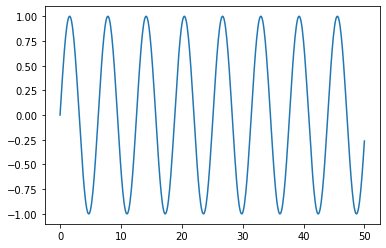

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x, columns=['sine'])

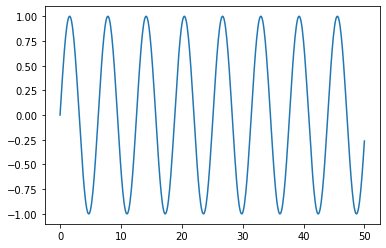

In [ ]:
plt.plot(df)

In [ ]:
#train test split but different

In [ ]:
test_percent = 0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_ind = int(len(df)-test_point)

In [ ]:
test_ind

451

In [ ]:
train = df.iloc[:test_ind]

In [ ]:
train

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [ ]:
test = df.iloc[test_ind:]

In [ ]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
#feed output back into themselves 
# we need to scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#batch generator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
length = 50 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [ ]:
len(generator)

401

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [ ]:
#the length should be enough for the network for it to pick up the sequence
y

array([[0.02053313]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [ ]:
# We're only using one feature in our time series
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [ ]:
model.fit_generator(generator,epochs=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
401/401 [==============================] - 5s 9ms/step - loss: 0.0132
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 7.6325e-04
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 5.3916e-05
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 6.4863e-05
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 8.3086e-05


In [ ]:
losses = pd.DataFrame(model.history.history)

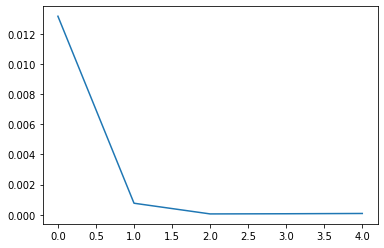

In [ ]:
plt.plot(losses)

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.95203966]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
current_batch.shape

(1, 50, 1)

In [ ]:
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:],[[[99]]], axis = 1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [ ]:
#inverse the scale
true_predictions =  scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[ 0.90407383],
       [ 0.93827244],
       [ 0.9690984 ],
       [ 0.98321386],
       [ 0.9915892 ],
       [ 0.9878147 ],
       [ 0.9734861 ],
       [ 0.95209846],
       [ 0.91545596],
       [ 0.87734863],
       [ 0.8219139 ],
       [ 0.76515786],
       [ 0.69646537],
       [ 0.62099409],
       [ 0.54311553],
       [ 0.44969136],
       [ 0.36540976],
       [ 0.25958375],
       [ 0.16748697],
       [ 0.05926834],
       [-0.04418316],
       [-0.14462828],
       [-0.25900045],
       [-0.3462889 ],
       [-0.46390443],
       [-0.54131615],
       [-0.64476079],
       [-0.72270078],
       [-0.79111563],
       [-0.87791098],
       [-0.90197028],
       [-0.99106166],
       [-0.98347976],
       [-1.04671376],
       [-1.04186516],
       [-1.03958563],
       [-1.07248433],
       [-0.98318793],
       [-1.05505454],
       [-0.90773375],
       [-0.96198582],
       [-0.84220236],
       [-0.78048557],
       [-0.78903229],
       [-0.54076213],
       [-0

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,sine,Predictions
45.1,0.899097,0.904074
45.2,0.938307,0.938272
45.3,0.968142,0.969098
45.4,0.988304,0.983214
45.5,0.998591,0.991589
45.6,0.998900,0.987815
45.7,0.989229,0.973486
45.8,0.969673,0.952098
45.9,0.940429,0.915456
46.0,0.901788,0.877349


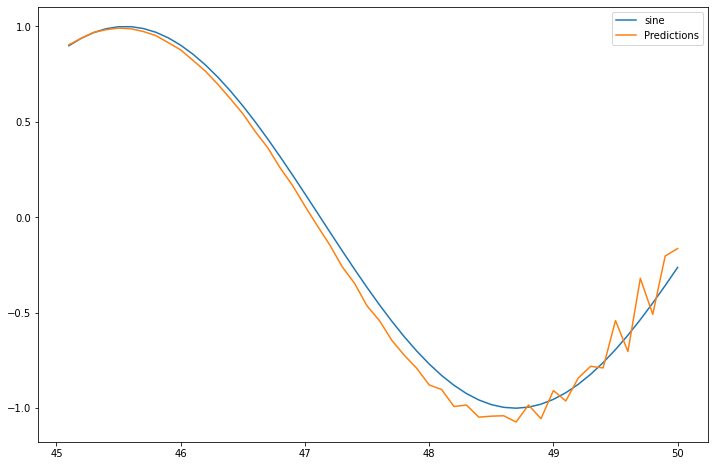

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
#lets use a LSTM unit on our sine wave
#we are going to use early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
  5/402 [..............................] - ETA: 10s - loss: 9.7014e-05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


402/402 [==============================] - 9s 21ms/step - loss: 1.0923e-04 - val_loss: 2.0748e-05
Epoch 2/20
402/402 [==============================] - 9s 22ms/step - loss: 6.7138e-05 - val_loss: 2.3021e-05
Epoch 3/20
402/402 [==============================] - 9s 21ms/step - loss: 2.3949e-04 - val_loss: 4.4665e-06
Epoch 4/20
402/402 [==============================] - 9s 22ms/step - loss: 5.6408e-04 - val_loss: 2.8159e-05
Epoch 5/20
402/402 [==============================] - 9s 23ms/step - loss: 1.3098e-05 - val_loss: 6.9018e-07
Epoch 6/20
402/402 [==============================] - 9s 22ms/step - loss: 2.9017e-05 - val_loss: 3.4036e-06
Epoch 7/20
402/402 [==============================] - 9s 21ms/step - loss: 1.0549e-04 - val_loss: 3.2724e-05


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


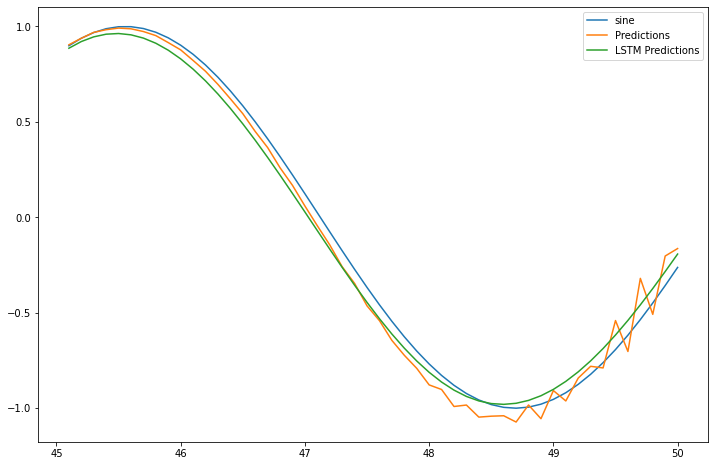

In [ ]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                               length=length,batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/6
452/452 [==============================] - 12s 21ms/step - loss: 0.0143
Epoch 2/6
452/452 [==============================] - 10s 21ms/step - loss: 6.2080e-05
Epoch 3/6
452/452 [==============================] - 9s 21ms/step - loss: 8.5982e-05
Epoch 4/6
452/452 [==============================] - 9s 21ms/step - loss: 2.7074e-04
Epoch 5/6
452/452 [==============================] - 9s 21ms/step - loss: 4.5223e-05
Epoch 6/6
452/452 [==============================] - 9s 21ms/step - loss: 7.0552e-05


In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)


In [ ]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
forecast_index  = np.arange(50.1, 52.6, step = 0.1)

In [ ]:
len(forecast)

25

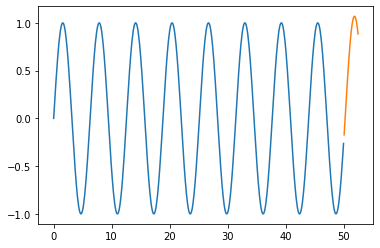

In [ ]:
plt.plot(df.index, df['sine'])
plt.plot(forecast_index, forecast)

In [ ]:
``